## Final Project Submission

Please fill out:
* Student name: Victor Kigen
* Student pace: Full time
* Scheduled project review date/time: 26 September 2024
* Instructor name: Mwikali



# Aviation Dataset

We have a dataset called `Aviation_Data.csv` that we will analysis/clean in order to present all the relevant facts to the management team. In order to analyse the data appropriately, we will have to follow the folliwing steps:

#### 1. Understand the Dataset

#### 2. Clean the Data

#### 3. Key Metrics for Risk Analysis

#### 4. Create new CSV file for Clean Data


## 1. Understand the Dataset

Understanding the data is the first step that needs to be performed. In the cell below, we import the required libraries including:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The file is located in the following path `data/Aviation_Data.csv`. We shall create a dataframe called aviation_data in order to read the data.

In [2]:
aviation_data = pd.read_csv('data/Aviation_data.csv', low_memory=False)

Using some the following built in pandas functions, we shall find out more info about the dataset that we have: 

- `.info`
- `.head`
- `.index`
- `.columns`
- `.dtypes`
- `.shape`


In [3]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_data.info()
aviation_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(90348, 31)

Based on the information given above, we have 31 columns of mixed datatypes. The first step of our data analysis will be identify which of the columns are relevant to our analysis. Apart from using the names of the columns, we can use the .unique() attribute to get a better understanding of the columns as shown below:

## 2. Clean the Data

Now that we understand the attributes of the dataset that we have been given, we now have to clean the data through the following steps: 

<b>2.1. Missing Values</b>

From my analysis, the irrelevant columns are: 

<b>1. Event.Id </b> - Has no relevance to our business problem <br>
<b> 2. Airport.Code </b> -  Has no relevance to our business problem <br>
<b> 5. Airport.Name </b> -  Same reason as the Airport.Code column<br>
<b> 3. Latitude </b> - 62.95% of the rows are missing data from this column. Business problem is also not location specific so not relevant<br>
<b> 4. Longitude </b> - 62.96% of the rows are missing this data from this column. Business problem is also not location specific so not relevant<br>
<b> 6. Publication.Date </b> - Not relevant <br>
<b> 7. Registration.Number </b> - Not relevant <br>
<b> 8. FAR.Description</b> - Not relevant <br>
<b> 9. Schedule</b>  - Not relevant <br>
<b> 10. Air.carrier</b> - Not relevant <br>
<b> 11. Amateur.Built</b> - Not relevant <br>

We should drop these columns from the dataset. 

In [5]:
columns_to_drop = ['Event.Id', 'Airport.Code', 'Latitude','Longitude','Airport.Name','Publication.Date','Registration.Number','FAR.Description','Schedule','Air.carrier','Amateur.Built']

adc = aviation_data.drop(columns=columns_to_drop)
adc.head()


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [6]:
adc.info()
adc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Aircraft.Category       32287 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

(90348, 20)

Now that we have the relevant columns, we now need to do the same thing with the rows. 

#### 2.2 Investigation.Type

In [7]:
unique_invenstigation_type = adc['Investigation.Type'].unique()
print(unique_invenstigation_type)

['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022'
 '01-11-2022' '01-07-2022' '20-07-2022' '06-10-2022' '23-09-2022'
 '02-12-2022' '05-08-2022' '08-12-2022' '15-12-2022' '20-12-2022']


The rows where the `Investigation.Type` column is neither <b>Accident</b> or <b>Incident</b> have null entries for all the other columns. As a result these rows are irrelevant and should be dropped.

In [8]:
# Drop rows where "Investigation.Type" is not "Accident" or "Incident".
adc = adc[adc['Investigation.Type'].isin(['Accident', 'Incident'])]

# Optionally, reset the index of the cleaned DataFrame
adc.reset_index(drop=True, inplace=True)
adc

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


#### 2.3 Accident.Number
No need to filter based on this column as we can use this unique identifier later on for ease of reference.
#### 2.4 Event.Date
We can use this column later on for plotting purposes to look at the trends such as accidents over time.


#### 2.5 Total.Fatal.Injuries/Total.Serious.Injuries/Total.Minor.Injuries/Total.Uninjured


In [9]:
unique_fatal_injuries = adc['Total.Fatal.Injuries'].unique()
print(unique_fatal_injuries)

[  2.   4.   3.   1.  nan   0.   8.  78.   7.   6.   5. 153.  12.  14.
  23.  10.  11.   9.  17.  13.  29.  70. 135.  31. 256.  25.  82. 156.
  28.  18.  43.  15. 270. 144. 174. 111. 131.  20.  73.  27.  34.  87.
  30.  16.  47.  56.  37. 132.  68.  54.  52.  65.  72. 160. 189. 123.
  33. 110. 230.  97. 349. 125.  35. 228.  75. 104. 229.  80. 217. 169.
  88.  19.  60. 113. 143.  83.  24.  44.  64.  92. 118. 265.  26. 138.
 206.  71.  21.  46. 102. 115. 141.  55. 121.  45. 145. 117. 107. 124.
  49. 154.  96. 114. 199.  89.  57. 152.  90. 103. 158. 157.  42.  77.
 127.  50. 239. 295.  58. 162. 150. 224.  62.  66. 112. 188.  41. 176.]


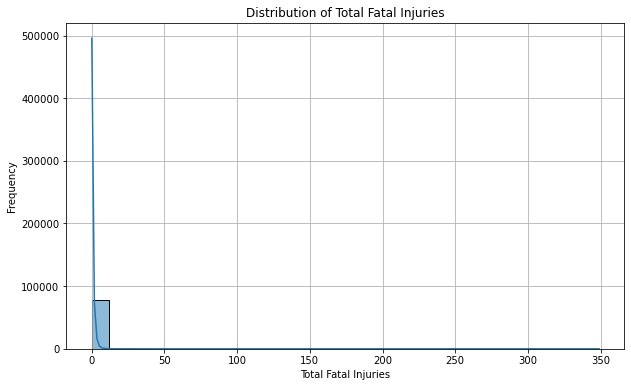

In [10]:
# Plot histogram for 'Total.Fatal.Injuries'
plt.figure(figsize=(10, 6))
sns.histplot(adc['Total.Fatal.Injuries'], bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

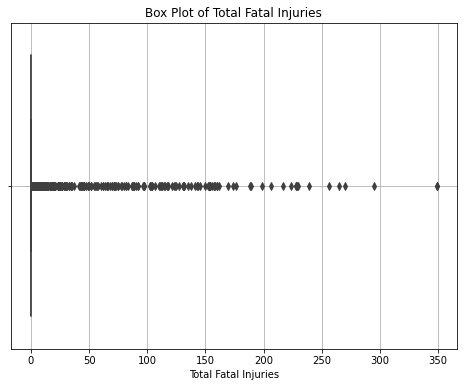

In [11]:
# Box plot to visualize distribution of 'Total.Fatal.Injuries'
plt.figure(figsize=(8, 6))
sns.boxplot(x=adc['Total.Fatal.Injuries'])

# Customize the plot
plt.title('Box Plot of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.grid(True)
plt.show()

In [12]:
skewness = adc['Total.Fatal.Injuries'].skew()
kurtosis = adc['Total.Fatal.Injuries'].kurt()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: 33.01867532377133
Kurtosis: 1355.6006468218097


A skewness of 33.018 suggests that we have alot of accidents with little to no fatal injuries. A Kurtosis of 1355.60 is extremely high, which tells us that we have a few extreme outliers in the dataset. 

As a result we should replace the null values with the median, which is more resistant to outliers. 

In [13]:
tfi_median = adc['Total.Fatal.Injuries'].median()

adc['Total.Fatal.Injuries'].fillna(tfi_median, inplace=True)

The same method should be repeated for the `Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured` columns.

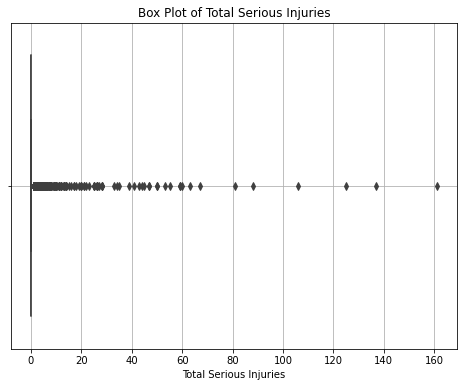

TSI Skewness: 49.40002484924553
TSI Kurtosis: 3737.3087081044137
TSI: 0.0
TMI Skewness: 87.26947645182727
TMI Kurtosis: 12365.048249512656
TMI: 0.0
TUI Skewness: 9.086104094841762
TUI Kurtosis: 104.61248908867307
TUI: 1.0


In [14]:
# Box plot to visualize distribution of 'Total.Fatal.Injuries'
plt.figure(figsize=(8, 6))
sns.boxplot(x=adc['Total.Serious.Injuries'])

# Customize the plot
plt.title('Box Plot of Total Serious Injuries')
plt.xlabel('Total Serious Injuries')
plt.grid(True)
plt.show()

skewness = adc['Total.Serious.Injuries'].skew()
kurtosis = adc['Total.Serious.Injuries'].kurt()

print(f'TSI Skewness: {skewness}')
print(f'TSI Kurtosis: {kurtosis}')

tsi_median = adc['Total.Serious.Injuries'].median()
print(f'TSI: {tsi_median}')
adc['Total.Serious.Injuries'].fillna(tsi_median, inplace=True)

skewness = adc['Total.Minor.Injuries'].skew()
kurtosis = adc['Total.Minor.Injuries'].kurt()

print(f'TMI Skewness: {skewness}')
print(f'TMI Kurtosis: {kurtosis}')

tmi_median = adc['Total.Minor.Injuries'].median()
print(f'TMI: {tmi_median}')
adc['Total.Minor.Injuries'].fillna(tmi_median, inplace=True)

skewness = adc['Total.Uninjured'].skew()
kurtosis = adc['Total.Uninjured'].kurt()

print(f'TUI Skewness: {skewness}')
print(f'TUI Kurtosis: {kurtosis}')

tui_median = adc['Total.Uninjured'].median()
print(f'TUI: {tui_median}')
adc['Total.Uninjured'].fillna(tui_median, inplace=True)

In [15]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64


#### 2.6 Injury.Severity

In [16]:
injury_severity = adc['Injury.Severity'].unique()
print(injury_severity)

['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)' 'Fatal(44)' 'Fatal(64)' 'Fatal(92

This column contains both categorical data and numerical data that is aready being represented in the `Total.Fatal.Injuries` column. As a result we should replace all `Fatal(x)` entries with just `Fatal` to convert the column to purely categorical. For NaN values, due to the low number of rows, I suggest that these rows should be dropped. 

In [17]:
adc = adc.dropna(subset=['Injury.Severity'])

In [18]:
# Loop through the Injury.Severity column and replace Fatal(X) with 'Fatal'
for index, value in adc['Injury.Severity'].iteritems():
    if 'Fatal(' in value:
        adc.at[index, 'Injury.Severity'] = 'Fatal'

# Optional: Check the unique values to confirm the changes
unique_injury_severity = adc['Injury.Severity'].unique()
print(unique_injury_severity)

['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' 'Minor' 'Serious']


In [19]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity               0
Aircraft.damage            2689
Aircraft.Category         56486
Make                         46
Model                        72
Number.of.Engines          5363
Engine.Type                6271
Purpose.of.flight          5243
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3580
Broad.phase.of.flight     26165
Report.Status              5472
dtype: int64


#### 2.7 Aircraft.Category 

Considering that our business problem states that we only interested in planes, we should drop all rows where `Aircraft.Category` is not <b>Airplane</b>. Retaining the NaN rows is of interest due to the large number of rows. We shall replace the NaN values with <b>Unknown</b> as a placeholder.

In [20]:
adc = adc[adc['Aircraft.Category'].isin(['Airplane']) | adc['Aircraft.Category'].isna()]
unique_categories = adc['Aircraft.Category'].unique()
print(unique_categories)

[nan 'Airplane']


In [21]:
adc.head(20)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause
5,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause
6,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,NaN,Cessna,180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
8,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause
9,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause


A quick glance of the data shows that there are different `Make` and `Model` combinations where `Aircraft.Category` rows are classified both as NaN and Airplane. Take the <b>Cessna 172</b> for example. There are a total of <b>1253</b> rows. Over <b>300</b> rows have been classified as Airplane. The remaining rows are <b>NaN</b>. Considering that over 300 rows are consistent in labelling the Make/Model as Aircraft, it is safe to assume that the any instance of <b>Cessna 172</b> is an Airplane. We can also apply the same logic for all combination of `Make` and `Model` as shown below.

In [22]:
for make in adc['Make'].unique():
    models = adc[adc['Make'] == make]['Model'].unique()
    for model in models:
        filtered_rows = adc[(adc['Make'] == make) & (adc['Model'] == model)]
        unique_categories = filtered_rows['Aircraft.Category'].nunique(dropna=True)
        if unique_categories == 1:
            probable_category = filtered_rows['Aircraft.Category'].dropna().unique()[0]
            adc.loc[(adc['Make'] == make) & (adc['Model'] == model), 'Aircraft.Category'] = probable_category

In [23]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     50
Country                     221
Injury.Severity               0
Aircraft.damage            2523
Aircraft.Category         17466
Make                         43
Model                        70
Number.of.Engines          4720
Engine.Type                5018
Purpose.of.flight          4599
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3035
Broad.phase.of.flight     22535
Report.Status              4552
dtype: int64


#### 2.8 Number.of.Engines

In [24]:
number_of_engines_unique = adc['Number.of.Engines'].unique()
print(number_of_engines_unique)

# Display category count
engines_counts = adc['Number.of.Engines'].value_counts()
print(engines_counts)

[ 1. nan  2.  3.  4.  0.  8.  6.]
1.0    66321
2.0    10630
0.0      728
3.0      481
4.0      407
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64


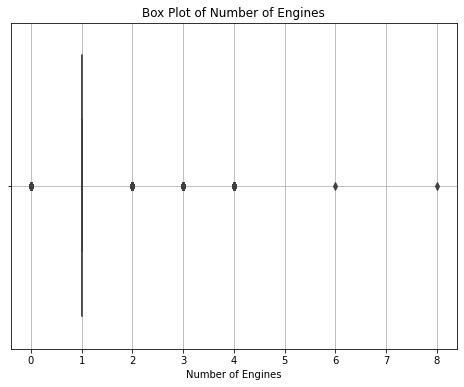

Skewness: 2.69191901143728
Kurtosis: 11.301147962500368


In [25]:
# Box plot to visualize distribution of 'Total.Fatal.Injuries'
plt.figure(figsize=(8, 6))
sns.boxplot(x=adc['Number.of.Engines'])

# Customize the plot
plt.title('Box Plot of Number of Engines')
plt.xlabel('Number of Engines')
plt.grid(True)
plt.show()

skewness = adc['Number.of.Engines'].skew()
kurtosis = adc['Number.of.Engines'].kurt()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Due to the right skewness and high kurtosis, we should replace the NaN values with the median.  

In [26]:
engines_median = adc['Number.of.Engines'].median()
print(engines_median)
adc['Number.of.Engines'].fillna(engines_median, inplace=True)

1.0


#### 2.9 Engine.Type

In [27]:
engine_type_unique = adc['Engine.Type'].unique()
engines_type_count = adc['Engine.Type'].value_counts()


print(engine_type_unique)
print(engines_type_count)

['Reciprocating' nan 'Turbo Fan' 'Turbo Prop' 'Turbo Jet' 'Turbo Shaft'
 'Unknown' 'Electric' 'Geared Turbofan' 'UNK']
Reciprocating      67615
Turbo Prop          3368
Turbo Fan           2359
Turbo Shaft         2287
Unknown             1947
Turbo Jet            689
Electric               4
Geared Turbofan        1
UNK                    1
Name: Engine.Type, dtype: int64


Placing the NaN rows with the 'Unknown' category is the most logical step.

In [28]:
# Replace NaN with "Engine.Type" mode 
# Add "Unknown" category
nan_count = adc['Engine.Type'].isna().sum()
print(nan_count)
adc['Engine.Type'] = adc['Engine.Type'].fillna('Unknown')

5018


In [29]:
engines_type_count = adc['Engine.Type'].value_counts()
print(engines_type_count)

Reciprocating      67615
Unknown             6965
Turbo Prop          3368
Turbo Fan           2359
Turbo Shaft         2287
Turbo Jet            689
Electric               4
Geared Turbofan        1
UNK                    1
Name: Engine.Type, dtype: int64


#### 2.10 Purpose.of.flight

In [30]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     50
Country                     221
Injury.Severity               0
Aircraft.damage            2523
Aircraft.Category         17466
Make                         43
Model                        70
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          4599
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3035
Broad.phase.of.flight     22535
Report.Status              4552
dtype: int64


In [31]:
print(adc['Purpose.of.flight'].unique())

['Personal' nan 'Business' 'Instructional' 'Ferry' 'Unknown'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO']


Placing the NaN rows with the 'Unknown' category is the most logical step.

In [32]:
nan_count = adc['Purpose.of.flight'].isna().sum()
print(nan_count)
adc['Purpose.of.flight'] = adc['Purpose.of.flight'].fillna('Unknown')

4599


#### 2.11 Weather.Condition

In [33]:
print(adc['Weather.Condition'].unique())
print(adc['Weather.Condition'].value_counts())

['UNK' 'IMC' 'VMC' nan 'Unk']
VMC    73368
IMC     5844
UNK      843
Unk      199
Name: Weather.Condition, dtype: int64


Same logic used here as the column above

In [34]:
nan_count = adc['Weather.Condition'].isna().sum()
print(nan_count)
adc['Weather.Condition'] = adc['Weather.Condition'].fillna('Unk')

3035


#### 2.12 Broad.phase.of.flight

In [35]:
print(adc['Broad.phase.of.flight'].unique())
print(adc['Broad.phase.of.flight'].value_counts())

['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other' nan]
Landing        15195
Takeoff        12352
Cruise         10117
Maneuvering     7895
Approach        6446
Climb           2018
Taxi            1942
Descent         1857
Go-around       1350
Standing         921
Unknown          546
Other            115
Name: Broad.phase.of.flight, dtype: int64


In [36]:
nan_count = adc['Broad.phase.of.flight'].isna().sum()
print(nan_count)
adc['Broad.phase.of.flight'] = adc['Broad.phase.of.flight'].fillna('Unknown')

22535


In [37]:
print(adc['Broad.phase.of.flight'].value_counts())

Unknown        23081
Landing        15195
Takeoff        12352
Cruise         10117
Maneuvering     7895
Approach        6446
Climb           2018
Taxi            1942
Descent         1857
Go-around       1350
Standing         921
Other            115
Name: Broad.phase.of.flight, dtype: int64


#### 2.13 Report.Status

In [38]:
print(adc['Report.Status'].unique())
#print(adc['Report.Status'].value_counts())

['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind gust during landing.']


An initial analysis shows that entries where the string <b>pilot</b> is mentioned insinuates that the pilot is at fault of the accident, not the plane. This is further confirmed by taking a sample as shown below:

In [39]:
# Select rows where 'Report.Status' contains 'pilot', ignoring case and handling NaNs
pilot_error_rows = adc[adc['Report.Status'].str.contains('pilot', case=False, na=False)]

# Display the rows
pilot_error_rows.head(100)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
63913,Accident,SEA08LA057,2008-01-01,"Sonoma, CA",United States,Non-Fatal,Substantial,Airplane,Barnard/Stancil,Glastar,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Unknown,The departing pilot's inadequate visual lookout.
63914,Accident,DFW08CA054,2008-01-01,"Arcola, TX",United States,Non-Fatal,Substantial,Airplane,Micco Aircraft Company,MAC-145B,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot's failure to maintain directional co...
63915,Accident,DEN08CA047,2008-01-02,"Loveland, CO",United States,Non-Fatal,Substantial,Airplane,Cessna,152,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,Unknown,the student pilot's premature flare resulting ...
63916,Accident,NYC08CA074,2008-01-02,"Brunswick, GA",United States,Non-Fatal,Substantial,Airplane,Beech,A36,1.0,Reciprocating,Business,0.0,0.0,0.0,3.0,VMC,Unknown,The pilot's inadequate compensation for wind c...
63921,Accident,MIA08LA035,2008-01-05,"Spotsylvania, VA",United States,Non-Fatal,Substantial,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Unknown,The pilot's failure to follow the checklist an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64103,Accident,CHI08FAMS2,2008-02-21,"Vik, Iceland",Iceland,Fatal,Substantial,Airplane,PIPER AIRCRAFT INC,PA-28-161,1.0,Reciprocating,Ferry,1.0,0.0,0.0,0.0,Unk,Unknown,The pilot's decision to fly into an area of fo...
64105,Accident,NYC08LA107,2008-02-21,"Princeton, NJ",United States,Non-Fatal,Substantial,Airplane,Christer,Vans RV9-A,1.0,Reciprocating,Personal,0.0,0.0,1.0,1.0,VMC,Unknown,A loss of engine power due to the pilot/owner'...
64107,Accident,NYC08FA109,2008-02-22,"Cumberland, MD",United States,Fatal,Substantial,Airplane,BEECH,A36,1.0,Reciprocating,Business,2.0,0.0,0.0,0.0,IMC,Unknown,The pilot's failure to maintain the proper app...
64109,Accident,DEN08LA061,2008-02-23,"Buena Vista, CO",United States,Non-Fatal,Substantial,Airplane,Hardy,Midget Mustang M-1,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot's failure to maintain directional co...


In [40]:
pilot_error_count = 0
adc['Report.Status'] = adc['Report.Status'].fillna('Unknown')

for index, value in adc['Report.Status'].iteritems():
    if 'pilot' in value:
        pilot_error_count += 1
print(pilot_error_count)

11563


<b>11,562</b> accidents are pilot related. Since this is a key column in our analysis, these rows should be flagged to differentiated for future risk analysis. A new column called `Pilot.Error` has been created to accomodate this statistic.

In [41]:
# Step 1: Initialize the 'Pilot.Error' column with default value
adc['Pilot.Error'] = 'No'  # Set default to 'No' initially

# Step 2: Update 'Pilot.Error' to 'Yes' where 'Report.Status' contains 'pilot'
for index, value in adc['Report.Status'].iteritems():
    if 'pilot' in value.lower():  # Convert to lower case for case insensitive matching
        adc.at[index, 'Pilot.Error'] = 'Yes'

# Optional: View the updated dataframe
print(adc[['Report.Status', 'Pilot.Error']].head())        

    Report.Status Pilot.Error
0  Probable Cause          No
1  Probable Cause          No
2  Probable Cause          No
3  Probable Cause          No
4  Probable Cause          No


#### 2.14 Aircraft.damage

NaN rows have been inserted into the <b>Unknown</b> category.

In [42]:
print(adc['Aircraft.damage'].unique())
print(adc['Aircraft.damage'].value_counts())

['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
Substantial    60328
Destroyed      17907
Minor           2454
Unknown           77
Name: Aircraft.damage, dtype: int64


In [43]:
nan_count = adc['Aircraft.damage'].isna().sum()
print(nan_count)
adc['Aircraft.damage'] = adc['Aircraft.damage'].fillna('Unknown')

2523


In [44]:
print(adc['Aircraft.damage'].value_counts())

Substantial    60328
Destroyed      17907
Unknown         2600
Minor           2454
Name: Aircraft.damage, dtype: int64


In [45]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     50
Country                     221
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         17466
Make                         43
Model                        70
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Pilot.Error                   0
dtype: int64


#### 2.15 Make

There seems to be an issue with case sensitivity in the column. An example is <b>Cessna</b> and <b>CESSNA</b>. In order to remove this, we shall convert all to lowercase.

In [46]:
print(adc['Make'].unique())
print(adc['Make'].value_counts())
unique_makes = adc['Make'].unique()
unique_makes_list = unique_makes.tolist()


['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
Cessna                       22220
Piper                        12026
CESSNA                        4841
Beech                         4330
PIPER                         2814
                             ...  
Murphy Aircraft Mfg, Ltd.        1
HOOVER DAVID                     1
Arnold Forest                    1
Stoltzfus                        1
MONNETT                          1
Name: Make, Length: 7521, dtype: int64


In [47]:
adc['Make'] = adc['Make'].str.lower()  # Convert all to lowercase to remove case sensitivity

#### 18. Location

Replace NaN values with the mode of the column.

In [48]:
print(adc['Location'].unique())
print(adc['Location'].value_counts())

['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']
ANCHORAGE, AK            432
MIAMI, FL                197
HOUSTON, TX              189
ALBUQUERQUE, NM          186
CHICAGO, IL              184
                        ... 
DAVENPORT, FL              1
Bogota, OF                 1
Mineral, VA                1
MARSH HARBOR, BAHAMAS      1
Altus, OK                  1
Name: Location, Length: 25630, dtype: int64


In [49]:
mode_value = adc['Location'].mode()[0]
adc['Location'].fillna(mode_value, inplace=True)

#### 19. Country

Replace NaN values with the mode of the column.

In [50]:
mode_value = adc['Country'].mode()[0]
adc['Country'].fillna(mode_value, inplace=True)

In [51]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         17466
Make                         43
Model                        70
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Pilot.Error                   0
dtype: int64


## 3. Key Metrics for Risk Analysis

Now that we have cleaned the data, we can now do a risk analysis on the same. Since the `Make` and `Model` columns are the foundation of our business problem, I am going to create a new dataframe called `airplane_make_df` that I will keep key statistics. I will create the following columns:

- `Accident.Frequency`
- `Total.Fatal.Injuries`
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`
- `Total.Injured`
- `Fatality.Rate`
- `Pilot.Error.Rate`
- `Risk.Score`


In [52]:
# Step 2: Create a new dataframe with these unique categories
airplane_make_df = pd.DataFrame(adc['Make'].unique(), columns=['Make'])

airplane_make_df['Accident.Frequency'] = 0
airplane_make_df['Total.Fatal.Injuries'] = 0
airplane_make_df['Total.Serious.Injuries'] = 0
airplane_make_df['Total.Minor.Injuries'] = 0
airplane_make_df['Total.Uninjured'] = 0
airplane_make_df['Total.Injured'] = 0

for make in airplane_make_df['Make']:
    model_data = adc[adc['Make'] == make]
    
    make_accidents = model_data.shape[0]
    total_fatal_injuries = model_data['Total.Fatal.Injuries'].sum()
    total_serious_injuries = model_data['Total.Serious.Injuries'].sum()
    total_minor_injuries = model_data['Total.Minor.Injuries'].sum()
    total_uninjured = model_data['Total.Uninjured'].sum()
    total_injured = total_fatal_injuries + total_serious_injuries + total_minor_injuries

    
    # Update the dataframe with the calculated values
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Accident.Frequency'] = make_accidents
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Total.Fatal.Injuries'] = total_fatal_injuries
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Total.Serious.Injuries'] = total_serious_injuries
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Total.Minor.Injuries'] = total_minor_injuries
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Total.Uninjured'] = total_uninjured
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Total.Injured'] = total_injured



In [53]:
airplane_make_df

,Make,Accident.Frequency,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
0,stinson,439,71.0,94.0,128.0,533.0,293.0
1,piper,14840,6689.0,3059.0,3757.0,18686.0,13505.0
2,cessna,27061,9641.0,4894.0,6876.0,35872.0,21411.0
3,rockwell,355,198.0,42.0,70.0,379.0,310.0
4,mcdonnell douglas,573,1275.0,544.0,1501.0,45125.0,3320.0
...,...,...,...,...,...,...,...
7016,phantom,1,0.0,1.0,0.0,0.0,1.0
7017,greg hobbs,1,2.0,0.0,0.0,0.0,2.0
7018,james r dernovsek,1,0.0,0.0,0.0,1.0,0.0
7019,orlican s r o,1,0.0,2.0,0.0,0.0,2.0


Calculating `Fatality.Rate` also shows us the severity of the accidents. `Fatality.Rate` = total_fatal_injuries/total_people.

In [54]:
airplane_make_df['Fatality.Rate'] = 0.0

for make in airplane_make_df['Make']:
    model_data = adc[adc['Make'] == make]
    
    make_accidents = model_data.shape[0]
    total_fatal_injuries = model_data['Total.Fatal.Injuries'].sum()
    total_serious_injuries = model_data['Total.Serious.Injuries'].sum()
    total_minor_injuries = model_data['Total.Minor.Injuries'].sum()
    total_uninjured = model_data['Total.Uninjured'].sum()

    total_people = total_fatal_injuries + total_serious_injuries + total_minor_injuries + total_uninjured
    
    if total_people == 0:
        fatality_rate = 'N/A'
        airplane_make_df = airplane_make_df[airplane_make_df['Make'] != make]        
    else:
        fatality_rate = round(((total_fatal_injuries/total_people)*100),2)
        # Update the dataframe with the calculated values
        airplane_make_df.loc[airplane_make_df['Make'] == make, 'Fatality.Rate'] = fatality_rate
    

In [55]:
airplane_make_df

,Make,Accident.Frequency,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured,Fatality.Rate
0,stinson,439,71.0,94.0,128.0,533.0,293.0,8.60
1,piper,14840,6689.0,3059.0,3757.0,18686.0,13505.0,20.78
2,cessna,27061,9641.0,4894.0,6876.0,35872.0,21411.0,16.83
3,rockwell,355,198.0,42.0,70.0,379.0,310.0,28.74
4,mcdonnell douglas,573,1275.0,544.0,1501.0,45125.0,3320.0,2.63
...,...,...,...,...,...,...,...,...
7016,phantom,1,0.0,1.0,0.0,0.0,1.0,0.00
7017,greg hobbs,1,2.0,0.0,0.0,0.0,2.0,100.00
7018,james r dernovsek,1,0.0,0.0,0.0,1.0,0.0,0.00
7019,orlican s r o,1,0.0,2.0,0.0,0.0,2.0,0.00


In [56]:
airplane_make_df['Pilot.Error.Rate'] = 0.0

for make in airplane_make_df['Make']:
    model_data = adc[adc['Make'] == make]
    pilot_error_count = 0
    make_accidents = model_data.shape[0]
    for index, value in model_data['Report.Status'].iteritems():
        if 'pilot' in value:
            pilot_error_count += 1
    if make_accidents > 0:        
        pilot_error_rate = round(((pilot_error_count/make_accidents)*100),2)
    else:
        pilot_error_rate = 0
    # Update the dataframe with the calculated values
    airplane_make_df.loc[airplane_make_df['Make'] == make, 'Pilot.Error.Rate'] = pilot_error_rate

`Risk.Score` is a metric that we can use to fairly compare the different Airplane Makes/Model. The formula:

`Risk.Score` = (W<sub>1</sub>*`Normalized.Frequency`) + (W<sub>2</sub>*`Normalized.Fatality.Rate`) + (W<sub>3</sub>*`Normalized.Pilot.Error.Rate`)

Where W<sub>1</sub>, W<sub>1</sub> and W<sub>1</sub> are the weights we give the different metrics based on the importance of the feature. In our case, Both Accident frequency and Fatality Rate are the most important metrics, thus we give both an importance of 45%. Pilot.Error on the other hand is not as important so it's given an importance of 10%.

In [57]:
airplane_make_df['Normalized.Frequency'] = (airplane_make_df['Accident.Frequency'] - airplane_make_df['Accident.Frequency'].min()) / (airplane_make_df['Accident.Frequency'].max() - airplane_make_df['Accident.Frequency'].min())
airplane_make_df['Normalized.Fatality.Rate'] = (airplane_make_df['Fatality.Rate'] - airplane_make_df['Fatality.Rate'].min()) / (airplane_make_df['Fatality.Rate'].max() - airplane_make_df['Fatality.Rate'].min())
airplane_make_df['Normalized.Pilot.Error.Rate'] = (airplane_make_df['Pilot.Error.Rate'] - airplane_make_df['Pilot.Error.Rate'].min()) / (airplane_make_df['Pilot.Error.Rate'].max() - airplane_make_df['Pilot.Error.Rate'].min())


# Calculate the risk score
airplane_make_df['Risk.Score'] = (0.45 * airplane_make_df['Normalized.Frequency'] + 0.45 * airplane_make_df['Normalized.Fatality.Rate'] + 0.1 * airplane_make_df['Normalized.Pilot.Error.Rate'])

# Sort the dataframe by 'Accident.Frequency' in descending order
airplane_make_df = airplane_make_df.sort_values(by='Accident.Frequency', ascending=False).reset_index(drop=True)

airplane_make_df.head(20)

,Make,Accident.Frequency,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured,Fatality.Rate,Pilot.Error.Rate,Normalized.Frequency,Normalized.Fatality.Rate,Normalized.Pilot.Error.Rate,Risk.Score
0,cessna,27061,9641.0,4894.0,6876.0,35872.0,21411.0,16.83,13.44,1.000000,0.1683,0.1344,0.539175
1,piper,14840,6689.0,3059.0,3757.0,18686.0,13505.0,20.78,13.85,0.548391,0.2078,0.1385,0.354136
2,beech,5355,3784.0,1095.0,1341.0,8330.0,6220.0,26.01,12.44,0.197886,0.2601,0.1244,0.218534
3,boeing,2282,8748.0,2157.0,2761.0,208531.0,13666.0,3.94,3.07,0.084328,0.0394,0.0307,0.058748
4,bell,1810,774.0,568.0,866.0,2205.0,2208.0,17.54,0.00,0.066886,0.1754,0.0000,0.109029
5,mooney,1331,685.0,248.0,391.0,1412.0,1324.0,25.04,13.60,0.049185,0.2504,0.1360,0.148413
6,grumman,1172,248.0,168.0,271.0,1273.0,687.0,12.65,4.01,0.043310,0.1265,0.0401,0.080424
7,bellanca,1044,345.0,196.0,239.0,987.0,780.0,19.52,11.97,0.038580,0.1952,0.1197,0.117171
8,hughes,688,144.0,170.0,270.0,918.0,584.0,9.59,0.00,0.025424,0.0959,0.0000,0.054596
9,air tractor,686,121.0,75.0,111.0,477.0,307.0,15.43,12.39,0.025350,0.1543,0.1239,0.093233


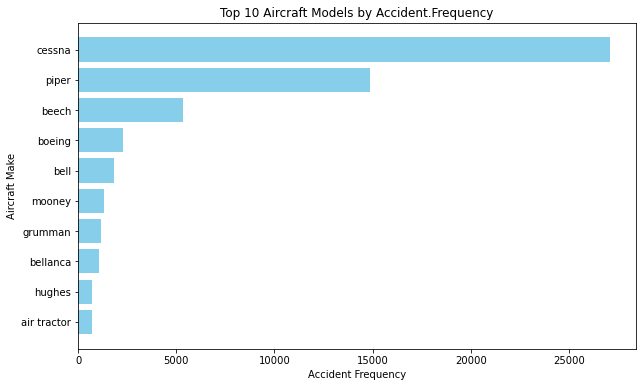

In [58]:
top_10_models = airplane_make_df.sort_values(by='Accident.Frequency', ascending=False).head(10)

# Plot the top 10 models by accident frequency
plt.figure(figsize=(10, 6))
plt.barh(top_10_models['Make'], top_10_models['Accident.Frequency'], color='skyblue')
plt.xlabel('Accident Frequency')
plt.ylabel('Aircraft Make')
plt.title('Top 10 Aircraft Models by Accident.Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
plt.show()

In [59]:
print(airplane_make_df['Risk.Score'].unique())


[5.39175000e-01 3.54135803e-01 2.18533816e-01 5.87475999e-02
 1.09028666e-01 1.48413328e-01 8.04243019e-02 1.17170778e-01
 5.45958189e-02 9.32325607e-02 1.06234303e-01 8.08961058e-02
 7.67495383e-02 2.13634727e-02 4.63426326e-02 1.01135501e-01
 6.28601737e-02 1.33812254e-01 6.66793335e-02 7.75594463e-02
 7.65389442e-02 1.34617315e-01 1.39173330e-01 4.75890673e-02
 3.30560345e-02 5.03945181e-02 8.13160960e-02 1.14273176e-01
 1.85093289e-01 1.49861772e-01 3.49253686e-02 3.75453686e-02
 5.21316084e-02 2.63089138e-02 7.71706556e-02 5.76007683e-02
 2.91925101e-02 9.31358810e-02 7.40343646e-02 1.83044477e-01
 1.82494590e-01 3.62129609e-02 7.22280736e-02 1.10036557e-01
 7.25515572e-02 1.91243524e-01 2.57318953e-02 1.85533637e-01
 1.49320081e-02 1.95887499e-02 4.57840880e-02 8.42692007e-02
 1.24224539e-01 4.66795388e-02 7.99012806e-02 8.72946515e-02
 5.20431351e-02 4.83083606e-02 8.31983606e-02 9.66783606e-02
 8.44001024e-02 2.45669569e-02 7.38869868e-03 8.12486987e-02
 1.12255440e-01 1.164621

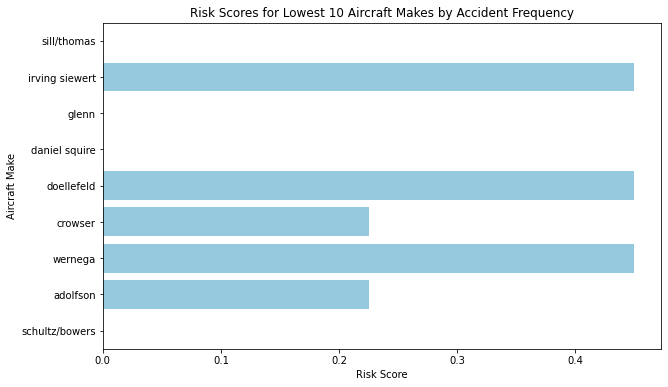

In [60]:
lowest_10_accident_models = airplane_make_df.sort_values(by='Accident.Frequency', ascending=True).head(10)

# Plot a bar chart for Risk Scores of the lowest 10 models by accident frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Risk.Score', y='Make', data=lowest_10_accident_models, color='skyblue')

# Labeling the axes and the chart
plt.xlabel('Risk Score')
plt.ylabel('Aircraft Make')
plt.title('Risk Scores for Lowest 10 Aircraft Makes by Accident Frequency')

plt.show()

The above shows that <b>correlation does not equal causation</b>. The lowest Aircraft Makes with regards to `Accident.Frequency` still have a high `Risk.Score`

## 4. Create new CSV files for Clean Data


Now that we have completed the cleaning and analysis of the data, we can create seperate csv files to ensure that the dashboards are created from the correct data.

In [61]:
# CSV file name
filename = 'data/airplane_make_data.csv'

# Write the airplane_make_df DataFrame to the CSV file
airplane_make_df.to_csv(filename, index=False)

In [62]:
# CSV file name
filename = 'data/airplane_data_clean.csv'

# Write the adc DataFrame to the CSV file
adc.to_csv(filename, index=False)

# Summary

**Recommendation 1:** Only purchase aircrafts that have a low risk score 

**Recommendation 2:** Gather more financial and aircraft usage information in order to make a more informed decision

**Recommendation 3:** Purchase aircrafts that require less pilot training as this can directly have a negative financial impact. Pilot training is related to the number of pilot error related accidents.  